<center><h1>Module 2 Assignment</h1></center>

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/MUHAMMAD/Documents/module-2/Data/Popular_Baby_Names.csv')

## Display top 7 rows of the dataframe in your notebook

In [2]:
df.head(7)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
5,2011,FEMALE,HISPANIC,GUADALUPE,26,62
6,2011,FEMALE,HISPANIC,HAILEY,126,8


## Count number of null values (if any) for each column

In [3]:
df.isnull().sum()

Year of Birth         0
Gender                0
Ethnicity             0
Child's First Name    0
Count                 0
Rank                  0
dtype: int64

## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

In [4]:
df_del = df.drop(df.columns[[0,1,2,3]], 1)
df_del

,Count,Rank
0,13,75
1,21,67
2,49,42
3,38,51
4,36,53
...,...,...
37532,18,94
37533,24,88
37534,16,96
37535,90,39


## Display the average, median, and standard deviation of each of your numerical columns

In [5]:
df_del.describe()
# Average = Mean, Median = 50%, Standard Deviation = STD

,Count,Rank
count,37537.000000,37537.000000
mean,33.913365,57.239151
std,38.963796,25.451669
min,10.000000,1.000000
25%,13.000000,38.000000
50%,20.000000,59.000000
75%,36.000000,78.000000
max,426.000000,102.000000


## Plot two of the numerical columns one against the other in a scatter plot

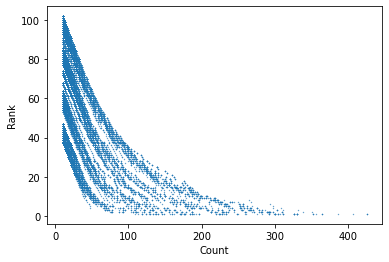

In [6]:
scatter_plot_df_del = df_del.plot.scatter(x = 'Count', y = 'Rank', s = 0.1)

## Plot the data distribution of all your numerical columns in histogram and boxplot

<AxesSubplot:ylabel='Frequency'>

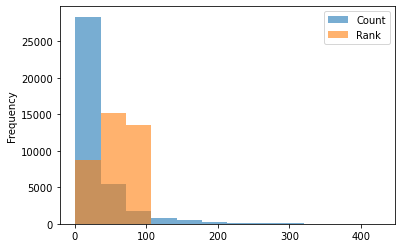

In [7]:
histogram_df_del = df_del.plot.hist(bins=12, alpha=0.6)
histogram_df_del

<AxesSubplot:>

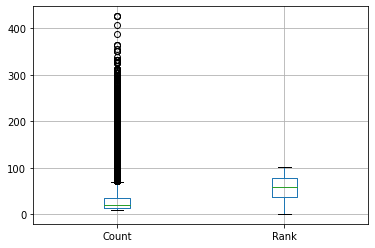

In [8]:
boxplot_df_del = df_del.boxplot()
boxplot_df_del

## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [9]:
df['RPV_Count'] = df['Count']*df['Count']
df['RPV_Rank'] = df['Rank']*df['Rank']
df

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank,RPV_Count,RPV_Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75,169,5625
1,2011,FEMALE,HISPANIC,GIA,21,67,441,4489
2,2011,FEMALE,HISPANIC,GIANNA,49,42,2401,1764
3,2011,FEMALE,HISPANIC,GISELLE,38,51,1444,2601
4,2011,FEMALE,HISPANIC,GRACE,36,53,1296,2809
...,...,...,...,...,...,...,...,...
37532,2014,MALE,WHITE NON HISPANIC,Yousef,18,94,324,8836
37533,2014,MALE,WHITE NON HISPANIC,Youssef,24,88,576,7744
37534,2014,MALE,WHITE NON HISPANIC,Yusuf,16,96,256,9216
37535,2014,MALE,WHITE NON HISPANIC,Zachary,90,39,8100,1521


# Citi Bike investigation
![citi-bike](images/citibike.jpeg)
>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

In [10]:
import pandas as pd
df2 = pd.read_csv('C:/Users/MUHAMMAD/Documents/module-2/Data/201802-citibike-tripdata.csv') #February 2018
df2

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,771,2018-02-01 00:14:16.4120,2018-02-01 00:27:08.2290,72,W 52 St & 11 Ave,40.767272,-73.993929,379,W 31 St & 7 Ave,40.749156,-73.991600,14536,Subscriber,1952,1
1,264,2018-02-01 05:14:45.1790,2018-02-01 05:19:09.6860,72,W 52 St & 11 Ave,40.767272,-73.993929,478,11 Ave & W 41 St,40.760301,-73.998842,32820,Subscriber,1965,1
2,819,2018-02-01 06:48:55.2290,2018-02-01 07:02:35.0290,72,W 52 St & 11 Ave,40.767272,-73.993929,405,Washington St & Gansevoort St,40.739323,-74.008119,16131,Subscriber,1968,1
3,646,2018-02-01 07:12:50.1740,2018-02-01 07:23:36.5280,72,W 52 St & 11 Ave,40.767272,-73.993929,2006,Central Park S & 6 Ave,40.765909,-73.976342,20831,Subscriber,1990,2
4,1312,2018-02-01 07:46:48.8750,2018-02-01 08:08:41.5430,72,W 52 St & 11 Ave,40.767272,-73.993929,435,W 21 St & 6 Ave,40.741740,-73.994156,15899,Subscriber,1957,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843109,510,2018-02-28 20:54:35.4120,2018-02-28 21:03:06.2820,3664,North Moore St & Greenwich St,40.720195,-74.010301,306,Cliff St & Fulton St_1,40.708235,-74.005301,32273,Subscriber,1991,1
843110,1953,2018-02-28 20:57:26.0010,2018-02-28 21:29:59.7280,3664,North Moore St & Greenwich St,40.720195,-74.010301,247,Perry St & Bleecker St,40.735354,-74.004831,17402,Subscriber,1993,1
843111,562,2018-02-28 21:15:38.6340,2018-02-28 21:25:01.5660,3664,North Moore St & Greenwich St,40.720195,-74.010301,279,Peck Slip & Front St,40.707873,-74.001670,25439,Subscriber,1991,1
843112,1013,2018-02-28 21:43:14.6540,2018-02-28 22:00:08.5460,3664,North Moore St & Greenwich St,40.720195,-74.010301,3632,E 12 St & Avenue B,40.728049,-73.978812,15068,Subscriber,1994,1


## Count the number of missing values of each column

In [11]:
df2.isna().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

## Who rides citibikes? Show ridership distribution by gender, user type, and age
Process the data and plot your answers

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [ ]:
df2["gender"].replace({0: "Unknown", 1: "Male", 2: "Female"}, inplace=True)
df2["gender"].value_counts().plot(kind='pie', autopct='%0.01f%%', pctdistance=0.7, labeldistance=1.1)

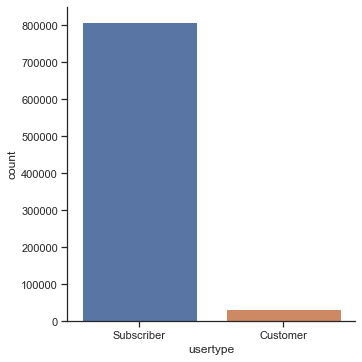

In [5]:
sns.catplot(x= "usertype", kind="count", data=df2)

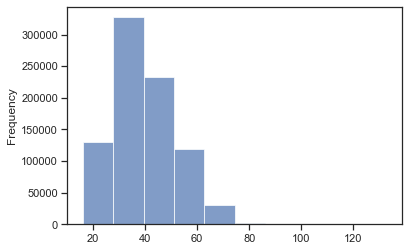

In [6]:
df2['age'] = 2018 - df2['birth year']
histogram_df2_age = df2['age'].plot.hist(bins=10, alpha=0.7)

## What is the average number of trips per day?

In [7]:
import datetime as dt
df2["starttime"] = df2["starttime"].astype("datetime64")
len(df2)/len(df2["starttime"].groupby(df2["starttime"].dt.day))

30111.214285714286

## What is the average trip duration?

In [8]:
df2['tripduration'].mean()

877.3977908088349

## What days of the week are most rides taken on?
Process the data and plot your answer

<AxesSubplot:>

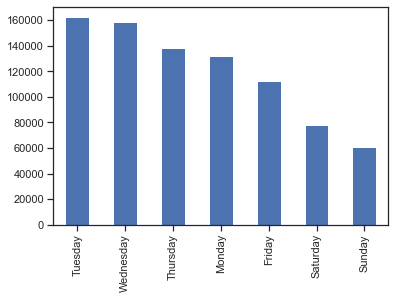

In [14]:
df2["day"] = df2["starttime"].dt.day_name()
df2["day"].value_counts().plot(kind='bar')
# On Tuesday

## What hour of the day are most rides taken on?
Process the data and plot your answer

<AxesSubplot:xlabel='starttime'>

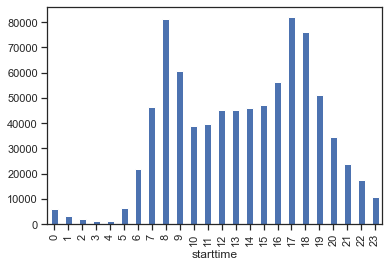

In [19]:
df2["starttime"].groupby(df2["starttime"].dt.hour).count().plot(kind='bar')
# on 8.00 and 17.00-18.00

## Is there correlation between age and trip duration?

In [20]:
df2['age'].corr(df2['tripduration'])
# The correlation is very weak (very close to 0)

-0.0005952353869217116

## What are the top 10 pair of stations that our riders use as a start & stopping point?

In [21]:
df2_station = pd.DataFrame({'start' : df2['start station id'], 'end' : df2['end station id']})
df2_station = df2_station.sort_values(by=['start', 'end'])
df2_station.index = range(843114)

df2_count = pd.DataFrame(columns=('start station id', 'end station id', 'trips'))
count = 1
for i in range (1,len(df2_station)):
    if df2_station['end'].loc[i] == df2_station['end'].loc[i-1]:
        count = count + 1
    else:
        df2_count.loc[i] = [df2_station['start'].loc[i-1], df2_station['end'].loc[i-1], count]
        count = 1
df2_count.loc[len(df2_station) - 1] = [df2_station['start'].loc[len(df2_station) - 1], df2_station['end'].loc[len(df2_station)-1], count]

df2_count_top10 = df2_count.sort_values(by=['trips'], ascending = False).head(10)
df2_count_top10.index = range(1,len(df2_count_top10) + 1)
df2_count_top10

,start station id,end station id,trips
1,432,3263,565
2,3164,3165,338
3,460,3093,335
4,3158,499,328
5,383,383,319
6,3093,460,292
7,239,270,282
8,435,509,281
9,3107,3090,281
10,519,491,279


# Come up with your own question on the Citibike data usage and formulate a hypothesis

### Example:
### "Women are less likely than men to choose biking for commuting."
>
>Null Hypothesis: 

>The proportion of men biking on weekends is the same or higher than the proportion of women biking on weekends



Hypothesis : Mostly Customers comes from Unknown Gender

## Work with your dataset and show your findings to help answer your question

<AxesSubplot:ylabel='gender'>

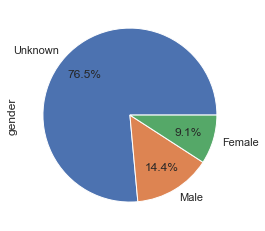

In [22]:
df2_customer = df2.loc[df2['usertype'] == "Customer"]
df2_customer["gender"].value_counts().plot(kind='pie', autopct='%0.01f%%', pctdistance=0.7, labeldistance=1.1)

# Submit Instructions
Rename this notebook to `mod2_<first_name>_<last_name>.ipynb` and push this to your branch in module-2 repository

```
git checkout -b tanyani
git add mod2_tanya_nabila.ipynb
git commit -m 'submit mod2 assignment for Tanya Nabila'
git push
```